# Quickstart

In [1]:
import AlloViz

## System setup

The [Protein](https://alloviz.readthedocs.io/en/latest/api/AlloViz.Protein.html) class constructor processes the input data to prepare it for the downstream calculations, analyses and visualization.

A structure and Molecular Dynamics simulation trajectories from [GPCRmd database](https://submission.gpcrmd.org/) of the GPCR Beta-2 adrenergic receptor (in complex with agonist epinephrine, GPCRmd ID [117](https://submission.gpcrmd.org/view/117/)) are included with the notebooks in AlloViz. Multiple trajectories can be passed in a list, e.g.: `["data/117/traj_1.xtc", "data/117/traj_2.xtc", "data/117/traj_3.xtc"]`

In [2]:
system = AlloViz.Protein(pdb="data/117/protein.pdb",
                         trajs="data/117/traj_1.xtc",
                         path="data/117")

/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


## Network calculation

AlloViz brings together 8 different Python packages, previously peer-reviewed and published, which allow the construction of allosteric communication networks using different descriptors (plus a network construction method we implemented ourselves). All the available options can be found in [this table](https://alloviz.readthedocs.io/en/latest/table.html) (the last column has the names to be used in the [calculate](https://alloviz.readthedocs.io/en/latest/api/AlloViz.Protein.calculate.html) method below).

We are going to use `pytraj_CA` as network construction method, which measures the correlation of the residues' positions along the trajectory using Pearson's linear correlation coefficient. Multiple networks can be calculated at the same time supplying a list of names, e.g. `["dynetan", "GetContacts"]`

In [3]:
system.calculate(pkgs="pytraj_CA")

pytraj_CA
adding raw data of pytraj_CA for data/117/protein.pdb:  ['data/117/data/pytraj_CA/raw/1.pq']


The calculated raw data is both saved as a file for reconstitution later and added as an attribute of the Protein object:

In [4]:
system.pytraj_CA.raw

weight
GLN:26  GLU:27   0.924889
        ARG:28   0.816165
        ASP:29   0.729000
        GLU:30   0.779299
        VAL:31   0.828841
...                   ...
LEU:339 CYS:341  0.897811
        LEU:342  0.753879
LEU:340 CYS:341  0.938434
        LEU:342  0.849064
CYS:341 LEU:342  0.903325

[45753 rows x 1 columns]

## Network filtering

AlloViz allows to filter the calculated networks according to different criteria (the different options are each of the functions defined in the [Filtering](https://alloviz.readthedocs.io/en/latest/api/AlloViz.AlloViz.Filtering.html) module).

We are going to filter the dynetan network using the [Spatially_distant](https://alloviz.readthedocs.io/en/latest/api/AlloViz.AlloViz.Filtering.Spatially_distant.html) filter, which filters out residue pairs of the network with a CA-CA distance below a threshold (default: 10 angstroms) to focus on long-range residue pairs. Multiple filterings can be performed supplying a list of strings to the [filter](https://alloviz.readthedocs.io/en/latest/api/AlloViz.Protein.filter.html) method.

In [5]:
system.filter(filterings="Spatially_distant")
# the same as doing: system.pyraj_CA.filter(filterings="Spatially_distant")

The results are stored as a new attribute of the `dynetan` results, with the filtered network stored as NetworkX's Graph object for later analysis:

In [6]:
system.pytraj_CA.Spatially_distant.graphs

{'weight': <networkx.classes.graph.Graph at 0x7f1da847eca0>}

## Network analysis

AlloViz can analyze the filtered networks with the betweenness centrality and current-flow betweenness centrality metrics (for edges and/or for nodes) functions of NetworkX. Other NetworkX functions that return per-edge or per-residue values can be passed to the [analyze](https://alloviz.readthedocs.io/en/latest/api/AlloViz.Protein.analyze.html) method using the instructions in the documentation.

For example, we can analyze the betweenness centrality ("btw") of both the edges and the nodes of the filtered network. As before, we can run multiple analysis at the same time by supplying lists.

In [7]:
system.analyze(elements=["edges", "nodes"], metrics="btw")
# the same as: system.dynetan.Spatially_distant.analyze(elements=["edges", "nodes"], metrics="btw")

adding analyzed edges <AlloViz.Wrappers.pytraj_w.pytraj_CA object at 0x7f1d40ddd970> Spatially_distant data of for data/117/protein.pdb
adding analyzed nodes <AlloViz.Wrappers.pytraj_w.pytraj_CA object at 0x7f1d40ddd970> Spatially_distant data of for data/117/protein.pdb


The results are stored as DataFrames as new attributes of the `Spatially_distant` filtering results, one for each element (nodes and edges) of the network.

In [8]:
system.pytraj_CA.Spatially_distant.nodes

,btw
GLN:26,0.010209
VAL:31,0.007019
TRP:32,0.002662
VAL:33,0.001760
VAL:34,0.007129
...,...
LEU:342,0.000154
GLU:27,0.012629
ARG:28,0.002816
ASP:29,0.000154


## Network visualization

The analysis results of the edges or the nodes (and also both together) can be visualised on the protein structure with an interactive widget. The exact element that we wish to visualise can be specified to the [view](https://alloviz.readthedocs.io/en/latest/api/AlloViz.Protein.view.html) method, or we can exploit the custom edges' and nodes' [DataFrames' view](https://alloviz.readthedocs.io/en/latest/api/AlloViz.AlloViz.Elements.Element.view.html) method.

For example, to view the edges' betweenness centrality analysis results:

/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


NGLWidget()

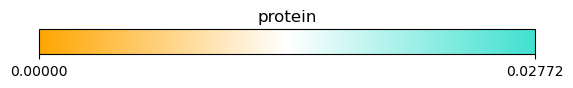

In [9]:
system.pytraj_CA.Spatially_distant.nodes.view("btw")
# the same as: system.view(pkg="pytraj_CA", metric="btw", filtering="Spatially_distant", element="nodes")